In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the datasets
df = pd.read_csv("Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [4]:
df.groupby("area_type").agg('count')

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [5]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
# finding duplicate rows
df.duplicated().sum()

529

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.area_type.isnull().sum()

0

In [9]:
df.society.unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [10]:
# dropping the unnecessary columns
df = df.drop(["availability","society","area_type",'balcony'],axis=1)
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,112.00
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00


In [11]:
# finding missing values
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
# handling missing values
df.dropna(inplace=True)
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

In [14]:
# Here,we can see that size and total_sqft columns data types are objects,but their value should be became float64.So,we should handle this

In [15]:
df["size"]

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13314        3 BHK
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
Name: size, Length: 12717, dtype: object

In [16]:
# First Handling size column
# Creating a new column,which will contain only size column's numeric value

def numeric_value(x):
    token = x.split(" ")
    # if we don't use int() function,then data types will be dtype('O')
    first_token = int(token[0])
    return first_token
    
df["bhk"] = df["size"].apply(numeric_value)
# or
# df["bhk"] = df["size"].apply(lambda x : int(x.split(" ")[0]))

In [17]:
df

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2


In [18]:
# droping size columns
df = df.drop(["size"],axis=1)
df

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13314,Green Glen Layout,1715,3.0,112.00,3
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2


In [19]:
# First Handling total_sqft column
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
# creating a function that will only able to convert total_sqft columns value to float
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df[df['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13314,Green Glen Layout,1715,3.0,112.00,3
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2


In [21]:
# Inverse operation of is_float function
df[~(df['total_sqft'].apply(is_float))].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [22]:
df[df["total_sqft"] == "34.46Sq. Meter"]

,location,total_sqft,bath,price,bhk
410,Kengeri,34.46Sq. Meter,1.0,18.5,1


In [23]:
# creating a function that will able to convert total_sqft columns value to float (1=>object convertible to float,2=>range object will return mean,3=>other return None)
def convert_float(x):
    token = x.split("-")
    if len(token)==2:
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [24]:
convert_float("1120")

1120.0

In [25]:
convert_float("1015 - 1540")

1277.5

In [26]:
convert_float("34.46Sq. Meter")

In [27]:
df["total_sqft"] = df["total_sqft"].apply(convert_float)
df

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,231.00,5
13316,Richards Town,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2


In [28]:
df.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [29]:
df[df["total_sqft"] == "34.46Sq. Meter"]

,location,total_sqft,bath,price,bhk


In [30]:
df.dtypes

location       object
total_sqft    float64
bath          float64
price         float64
bhk             int64
dtype: object

# Feature Engineering

In [31]:
df1 = df.copy()
df1

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,231.00,5
13316,Richards Town,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2


In [32]:
# Removing extra strip from location columns
df1["location"] = df1["location"].apply(lambda x: x.strip())

In [33]:
location_stats = df1.location.value_counts()
location_stats

Whitefield                        518
Sarjapur  Road                    372
Electronic City                   289
Kanakpura Road                    242
Thanisandra                       231
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [34]:
len(location_stats[location_stats<=10])

1060

In [35]:
location_less_than_10 = location_stats[location_stats<=10]
location_less_than_10

Dairy Circle                      10
Ganga Nagar                       10
Nagadevanahalli                   10
Dodsworth Layout                  10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1060, dtype: int64

In [36]:
len(df1.location.unique())

1293

In [37]:
df1['location'] = df1['location'].apply(lambda x: "other" if x in location_less_than_10 else x)
len(df1.location.unique())

234

# Yeep,Now we have to remove outlier from our datasets

In [38]:
df2 = df1.copy()
df2

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,231.00,5
13316,other,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2


In [39]:
df2["price_per_sqrt"] = (df2["price"]*100000)/df2["total_sqft"]
df2

,location,total_sqft,bath,price,bhk,price_per_sqrt
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,112.00,3,6530.612245
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,other,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136


In [40]:
df2[df2["total_sqft"]/df2["bhk"]<300]

,location,total_sqft,bath,price,bhk,price_per_sqrt
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13221,other,1178.0,9.0,75.0,9,6366.723260
13277,other,1400.0,7.0,218.0,7,15571.428571
13279,other,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091


In [41]:
df3 = df2[~(df2["total_sqft"]/df2["bhk"]<300)]
df3.shape

(11983, 6)

In [47]:
for x,y in df.groupby("location"):
    print(x)
    print(y)

 Anekal
     location  total_sqft  bath  price  bhk
2557   Anekal       351.0   1.0   16.0    1
 Banaswadi
        location  total_sqft  bath  price  bhk
8385   Banaswadi       527.0   1.0   35.0    1
 Basavangudi
          location  total_sqft  bath  price  bhk
7638   Basavangudi       670.0   1.0   50.0    1
 Bhoganhalli
          location  total_sqft  bath  price  bhk
2486   Bhoganhalli       296.0   1.0  22.89    1
 Devarabeesana Halli
                   location  total_sqft  bath  price  bhk
2764    Devarabeesana Halli      1100.0   2.0   70.0    2
3281    Devarabeesana Halli      1672.0   3.0  150.0    3
3620    Devarabeesana Halli      1750.0   3.0  149.0    3
6000    Devarabeesana Halli      1670.0   3.0  160.0    3
6120    Devarabeesana Halli      1750.0   3.0  150.0    3
10745   Devarabeesana Halli      1296.0   2.0   70.0    2
 Devarachikkanahalli
                   location  total_sqft  bath  price  bhk
152     Devarachikkanahalli      1250.0   2.0   44.0    3
341     Devar

                          location  total_sqft  bath  price  bhk
7320  2nd phase jp nagar, jp nagar      1200.0   3.0  205.0    3
3rd Block Banashankari
                     location  total_sqft  bath  price  bhk
1727   3rd Block Banashankari      1700.0   2.0  550.0    4
2439   3rd Block Banashankari      2400.0   8.0  650.0    6
9558   3rd Block Banashankari      1200.0   4.0  175.0    4
10794  3rd Block Banashankari      1626.6   3.0  133.0    3
11674  3rd Block Banashankari      2400.0   4.0  325.0    5
3rd Block HBR Layout
                  location  total_sqft  bath  price  bhk
1871  3rd Block HBR Layout      2000.0   3.0  100.0    3
3rd Block Hrbr Layout
                    location  total_sqft  bath  price  bhk
483    3rd Block Hrbr Layout      1200.0   5.0  190.0    5
560    3rd Block Hrbr Layout      1056.0   2.0   80.0    2
6022   3rd Block Hrbr Layout      1200.0   3.0  210.0    4
7422   3rd Block Hrbr Layout      1200.0   2.0  200.0    2
9359   3rd Block Hrbr Layout      1

            location  total_sqft  bath  price  bhk
121    Akshaya Nagar      2061.0   3.0  200.0    3
353    Akshaya Nagar      1388.0   2.0   57.0    2
468    Akshaya Nagar      1070.0   2.0   54.0    2
684    Akshaya Nagar      1250.0   3.0   40.0    3
1036   Akshaya Nagar      1280.0   2.0   58.0    2
...              ...         ...   ...    ...  ...
10557  Akshaya Nagar      1421.0   2.0   73.0    3
11810  Akshaya Nagar      1200.0   2.0   45.0    2
12012  Akshaya Nagar      1893.0   4.0   95.0    3
13003  Akshaya Nagar       900.0   2.0   45.0    2
13126  Akshaya Nagar      1200.0   4.0  125.0    4

[61 rows x 5 columns]
Akshaya Vana
           location  total_sqft  bath  price  bhk
323    Akshaya Vana      1200.0   4.0  165.0    4
2543   Akshaya Vana      4000.0   4.0  170.0    4
2813   Akshaya Vana      1300.0   2.0   49.0    3
7043   Akshaya Vana      1280.0   2.0   49.0    3
7257   Akshaya Vana      1141.0   2.0   55.0    2
8894   Akshaya Vana      1260.0   2.0   49.0    3
99

           location  total_sqft  bath   price  bhk
1032   Babusapalaya      1358.0   2.0   43.40    3
1413   Babusapalaya      1213.0   2.0   41.39    3
1416   Babusapalaya      1611.0   2.0   66.00    3
1817   Babusapalaya      1167.0   2.0   39.98    3
2803   Babusapalaya       810.0   5.0   95.00    6
3036   Babusapalaya      1675.0   3.0   75.00    3
3355   Babusapalaya      1141.0   2.0   46.00    2
3373   Babusapalaya      1084.0   2.0   58.00    2
3581   Babusapalaya      1500.0   2.0   57.00    2
3693   Babusapalaya      1453.0   2.0   43.59    3
4022   Babusapalaya      1050.0   2.0   45.00    2
4101   Babusapalaya      1141.0   2.0   45.90    2
4885   Babusapalaya      1358.0   2.0   43.10    3
5637   Babusapalaya      1230.0   3.0   53.00    3
6212   Babusapalaya      1105.0   2.0   40.00    2
7227   Babusapalaya      1410.0   2.0   65.00    3
7846   Babusapalaya      1305.0   2.0   70.00    2
8203   Babusapalaya      1450.0   2.0   55.99    2
9307   Babusapalaya      1100.0

           location  total_sqft  bath  price  bhk
10026  Bharat Nagar      1500.0   4.0  180.0    3
Bharath Housing Society Layout
                            location  total_sqft  bath  price  bhk
1534  Bharath Housing Society Layout      2400.0   3.0  200.0    4
Bharathi Nagar
             location  total_sqft  bath   price  bhk
2422   Bharathi Nagar      1322.0   2.0   68.00    2
2686   Bharathi Nagar      1739.0   3.0  105.00    3
3337   Bharathi Nagar      1351.0   2.0   70.00    2
5419   Bharathi Nagar      1384.0   2.0   59.00    2
7449   Bharathi Nagar      1351.0   2.0   74.00    2
8326   Bharathi Nagar      1432.0   2.0   68.00    2
9085   Bharathi Nagar      1664.0   3.0   69.89    3
9694   Bharathi Nagar      1349.0   2.0   56.70    2
9791   Bharathi Nagar      1328.0   2.0   69.00    2
10891  Bharathi Nagar      1120.0   2.0   39.29    2
12828  Bharathi Nagar      1300.0   2.0   55.86    2
13177  Bharathi Nagar      1379.0   2.0   85.00    2
Bharathnagar
          location

               location  total_sqft  bath  price  bhk
2426   Cambridge Layout      2400.0   3.0  260.0    3
4199   Cambridge Layout      1600.0   3.0  165.0    4
4396   Cambridge Layout      1750.0   5.0  450.0    5
8536   Cambridge Layout      1950.0   3.0  230.0    3
9032   Cambridge Layout      1756.0   3.0  307.0    3
10022  Cambridge Layout      1244.0   2.0   95.0    2
10164  Cambridge Layout      1669.0   3.0  298.0    3
10912  Cambridge Layout      2098.0   3.0  210.0    3
Canara Bank Colony
                 location  total_sqft  bath  price  bhk
3927   Canara Bank Colony      1650.0   2.0  52.00    3
4106   Canara Bank Colony      1000.0   2.0  45.00    2
7296   Canara Bank Colony      1374.0   2.0  88.00    3
7365   Canara Bank Colony       900.0   2.0  35.00    2
9506   Canara Bank Colony      1600.0   2.0  90.00    3
11538  Canara Bank Colony      1250.0   2.0  77.13    3
12016  Canara Bank Colony      1300.0   3.0  42.25    3
Canara Bank Layout
                location  to

          location  total_sqft  bath    price  bhk
109    Devanahalli      1260.0   2.0   66.780    2
124    Devanahalli      1282.0   2.0   68.520    3
136    Devanahalli      1360.0   2.0   65.000    2
1090   Devanahalli      6136.0   4.0  560.000    4
1241   Devanahalli      1408.0   2.0   85.000    2
1418   Devanahalli      1010.0   2.0   51.000    2
2692   Devanahalli      1080.0   2.0   53.350    2
2802   Devanahalli      5000.0   5.0  395.000    4
3442   Devanahalli      2400.0   5.0  100.000    5
3485   Devanahalli      1080.0   2.0   44.000    2
3846   Devanahalli      1282.0   2.0   52.430    3
4025   Devanahalli      1174.0   2.0   59.000    2
4249   Devanahalli      1600.0   3.0  180.000    3
5762   Devanahalli      2400.0   5.0  190.000    4
5789   Devanahalli      1200.0   1.0   95.000    1
5878   Devanahalli      5000.0   4.0  465.000    4
5973   Devanahalli       658.0   1.0   34.000    1
6240   Devanahalli       658.0   1.0   26.910    1
6682   Devanahalli       698.5 

               location  total_sqft  bath   price  bhk
2623   Dodsworth Layout     30000.0   4.0  2100.0    4
4352   Dodsworth Layout      1400.0   2.0    80.0    2
6387   Dodsworth Layout      1717.0   3.0    99.0    3
6440   Dodsworth Layout      1594.0   3.0    99.0    3
7647   Dodsworth Layout      1893.0   3.0   115.0    3
7736   Dodsworth Layout      1400.0   2.0    85.0    2
9798   Dodsworth Layout      4446.0   3.0   410.0    3
10052  Dodsworth Layout      1340.0   2.0    71.0    2
12366  Dodsworth Layout      5656.0   5.0   499.0    3
12987  Dodsworth Layout     30400.0   4.0  1824.0    6
Dollar Scheme Colony
                  location  total_sqft  bath  price  bhk
5430  Dollar Scheme Colony      3563.0   6.0  310.0    4
6727  Dollar Scheme Colony      3463.0   6.0  310.0    4
Dollars Colony
             location  total_sqft  bath   price  bhk
2379   Dollars Colony      3500.0   4.0   350.0    4
3557   Dollars Colony      3100.0   5.0   385.0    4
4180   Dollars Colony      10

             location  total_sqft  bath  price  bhk
11517  Gayathri Nagar       880.0   1.0   90.0    2
Geddalahalli
           location  total_sqft  bath  price  bhk
3284   Geddalahalli      1400.0   2.0   65.0    2
7731   Geddalahalli      1200.0   3.0   95.0    5
8574   Geddalahalli       850.0   2.0   32.5    2
11979  Geddalahalli       893.0   2.0   34.5    2
Geetanjali Layout
               location  total_sqft  bath  price  bhk
3793  Geetanjali Layout      1200.0   4.0  300.0    4
Geleyara Balaga Layout
                    location  total_sqft  bath  price  bhk
268   Geleyara Balaga Layout       700.0   1.0   26.0    2
6726  Geleyara Balaga Layout       596.0   2.0   22.0    2
Gidada Konnenahalli
                  location  total_sqft  bath  price  bhk
5965   Gidada Konnenahalli       600.0   4.0  105.0    6
10376  Gidada Konnenahalli      1200.0   4.0  240.0    4
Giri Nagar
         location  total_sqft  bath  price  bhk
299    Giri Nagar       880.0   3.0  140.0    3
325    Gi

          location  total_sqft  bath  price  bhk
566    HRBR Layout      2000.0   4.0  300.0    4
621    HRBR Layout      1374.0   2.0   95.0    2
1445   HRBR Layout      1440.0   2.0   98.0    2
2415   HRBR Layout      1567.0   3.0   90.0    3
3158   HRBR Layout      2800.0   3.0  250.0    3
4129   HRBR Layout      1210.0   2.0   75.0    2
4863   HRBR Layout      1200.0   2.0  170.0    4
5259   HRBR Layout      1265.0   2.0   78.0    2
5528   HRBR Layout      1200.0   6.0  250.0    6
6169   HRBR Layout      1000.0   6.0  275.0    6
6842   HRBR Layout      1200.0   3.0  180.0    4
6872   HRBR Layout      1170.0   2.0   75.0    2
7396   HRBR Layout      1335.0   2.0   87.0    3
9497   HRBR Layout      1900.0   3.0   90.0    4
9569   HRBR Layout      1625.0   3.0  120.0    3
10087  HRBR Layout      1301.0   2.0  120.0    2
11711  HRBR Layout      1145.0   2.0   68.5    2
12181  HRBR Layout      1200.0   3.0  240.0    3
12248  HRBR Layout      1300.0   2.0   90.0    2
HSR Layout
         

              location  total_sqft  bath  price  bhk
1509   Hiremath Layout      1435.0   3.0   70.0    3
7213   Hiremath Layout      1490.0   2.0   92.0    3
8937   Hiremath Layout      1140.0   2.0   56.0    2
10099  Hiremath Layout      1715.0   3.0   95.0    3
10422  Hiremath Layout      3150.0   3.0  135.0    4
Hommadevanahalli
              location  total_sqft  bath  price  bhk
7915  Hommadevanahalli       927.0   2.0   50.0    2
Hongasandra
          location  total_sqft  bath  price  bhk
1911   Hongasandra       680.0   2.0   42.0    2
1979   Hongasandra       990.0  12.0  120.0    8
3039   Hongasandra       600.0   7.0   89.0    7
4468   Hongasandra      1150.0   2.0   49.0    2
6452   Hongasandra      1065.0   2.0   45.0    2
8190   Hongasandra      1200.0   8.0  150.0    8
8417   Hongasandra      1180.0   2.0   39.0    2
11568  Hongasandra      1065.0   2.0   45.0    2
Hoodi
      location  total_sqft  bath    price  bhk
424      Hoodi       985.0   2.0   67.000    2
446   

                    location  total_sqft  bath  price  bhk
5895   Jakkasandra Extension       990.0   2.0   58.0    2
6219   Jakkasandra Extension      1205.0   2.0   70.0    2
6854   Jakkasandra Extension      2679.0   5.0  280.0    4
8364   Jakkasandra Extension      1000.0   2.0   63.0    2
11205  Jakkasandra Extension       950.0   2.0   57.0    2
Jakkur
      location  total_sqft  bath   price  bhk
295     Jakkur     1417.00   2.0   75.00    2
524     Jakkur     5230.00   6.0  465.00    4
726     Jakkur     1590.00   2.0  125.00    3
752     Jakkur     1279.00   2.0   77.00    2
920     Jakkur     1710.00   3.0  107.00    3
...        ...         ...   ...     ...  ...
12518   Jakkur     1432.00   2.0   85.00    2
12661   Jakkur     1150.00   3.0   65.00    3
12843   Jakkur     1932.47   3.0  183.00    3
12949   Jakkur     1710.00   3.0  110.00    3
13201   Jakkur     1125.00   2.0   44.75    2

[67 rows x 5 columns]
Jakkur Plantation
                location  total_sqft  bath  pr

      location  total_sqft  bath  price  bhk
7724  KG Halli       375.0   1.0   26.0    1
KHB Colony Extension
                  location  total_sqft  bath  price  bhk
7095  KHB Colony Extension       900.0   2.0   65.0    3
KPC Layout
        location  total_sqft  bath  price  bhk
1591  KPC Layout      1210.0   2.0   62.0    2
KR Garden
        location  total_sqft  bath  price  bhk
3429   KR Garden       925.0   2.0   63.0    2
8542   KR Garden      1300.0   2.0   60.0    2
9266   KR Garden      1700.0   3.0  250.0    3
10189  KR Garden      1200.0   2.0  135.0    2
12095  KR Garden      1050.0   2.0   65.0    2
KR Layout
       location  total_sqft  bath  price  bhk
1028  KR Layout       950.0   1.0   40.0    1
3673  KR Layout      4800.0   4.0  700.0    4
9918  KR Layout      1050.0   2.0   41.0    1
KR Puram
       location  total_sqft  bath   price  bhk
48     KR Puram       800.0   1.0  130.00    2
188    KR Puram      1277.5   2.0   56.80    2
368    KR Puram       930.0   2.0 

Kanakadasa Layout
               location  total_sqft  bath  price  bhk
3433  Kanakadasa Layout      1200.0   3.0   95.0    4
Kanakapur main road
                  location  total_sqft  bath  price  bhk
13101  Kanakapur main road      1025.0   2.0  43.04    2
Kanakapura
         location  total_sqft  bath    price  bhk
590    Kanakapura      1419.0   3.0   75.000    3
623    Kanakapura       711.0   1.0   36.000    1
1030   Kanakapura       711.0   1.0   38.000    1
1067   Kanakapura       929.0   2.0   46.000    2
1560   Kanakapura      1090.0   2.0   32.690    2
1627   Kanakapura       551.0   1.0   30.000    1
1958   Kanakapura      1020.0   2.0   42.830    2
1999   Kanakapura      1699.0   3.0   97.000    3
2508   Kanakapura      1290.0   2.0   45.150    3
2748   Kanakapura      1130.0   2.0   45.200    2
3049   Kanakapura      1476.0   3.0   75.000    3
3176   Kanakapura      1290.0   3.0   45.150    3
3359   Kanakapura      1295.0   2.0   64.000    2
3578   Kanakapura      1160.0

                location  total_sqft  bath  price  bhk
680    Kodichikkanahalli      1190.0   2.0   57.0    3
864    Kodichikkanahalli       995.0   2.0   41.0    2
1446   Kodichikkanahalli       650.0   1.0   38.0    1
2519   Kodichikkanahalli      2700.0   7.0  125.0    5
3307   Kodichikkanahalli      1495.0   2.0   75.0    3
3490   Kodichikkanahalli      3250.0   4.0  180.0    4
3507   Kodichikkanahalli      1125.0   2.0   52.0    2
4354   Kodichikkanahalli      1150.0   2.0   48.0    2
4406   Kodichikkanahalli      1070.0   2.0   43.0    2
4674   Kodichikkanahalli      1620.0   2.0   85.0    3
5264   Kodichikkanahalli      1560.0   2.0   65.0    3
5656   Kodichikkanahalli      1025.0   2.0   66.0    2
5777   Kodichikkanahalli      1600.0   4.0  200.0    6
6652   Kodichikkanahalli      1026.0   2.0   45.0    2
6713   Kodichikkanahalli      2500.0   7.0  125.0    5
7847   Kodichikkanahalli       450.0   1.0   18.0    1
8401   Kodichikkanahalli       907.0   2.0   38.5    2
8623   Kod

               location  total_sqft  bath  price  bhk
3395  Kumbhena Agrahara      1200.0   5.0  150.0    6
Kundalahalli
           location  total_sqft  bath   price  bhk
37     Kundalahalli      1724.0   3.0  125.00    3
627    Kundalahalli      1030.0   2.0   49.00    2
766    Kundalahalli       735.0   2.0   57.99    2
943    Kundalahalli      1047.0   2.0   82.00    2
1164   Kundalahalli      1397.0   3.0  105.00    3
1528   Kundalahalli      1291.0   2.0   49.00    2
1780   Kundalahalli      1724.0   3.0  127.00    3
2230   Kundalahalli      1010.0   2.0   49.27    2
3522   Kundalahalli      1397.0   3.0  110.00    3
3539   Kundalahalli      2400.0   1.0  650.00    1
3583   Kundalahalli      1397.0   3.0  104.00    3
3600   Kundalahalli      1397.0   3.0  108.00    3
3770   Kundalahalli      1920.0   3.0  150.00    3
5144   Kundalahalli      1800.0   3.0   80.00    3
5336   Kundalahalli      1724.0   3.0  124.00    3
5576   Kundalahalli      1047.0   2.0   84.00    2
5640   Kunda

              location  total_sqft  bath  price  bhk
574  Marathalli bridge      1544.0   3.0  120.0    3
Marathi Layout
            location  total_sqft  bath  price  bhk
1019  Marathi Layout         NaN   1.0  110.0    1
Marenahalli
         location  total_sqft  bath  price  bhk
3722  Marenahalli      1865.0   4.0  140.0    3
5967  Marenahalli       840.0   1.0   75.0    1
Margondanahalli
              location  total_sqft  bath   price  bhk
614    Margondanahalli       940.0   4.0  150.00    5
1008   Margondanahalli      2400.0   2.0   82.00    2
2123   Margondanahalli      1090.0   2.0   58.00    2
2349   Margondanahalli      1200.0   2.0   58.50    2
2461   Margondanahalli      1200.0   2.0   67.00    2
2733   Margondanahalli      1200.0   2.0   65.00    3
2779   Margondanahalli      1200.0   1.0   53.00    2
3771   Margondanahalli      1000.0   2.0   57.00    2
3855   Margondanahalli      1625.0   3.0   80.00    3
4659   Margondanahalli      1360.0   2.0   45.00    4
5093   Marg

          location  total_sqft  bath    price  bhk
15     Mysore Road     1175.00   2.0   73.500    2
150    Mysore Road     1710.00   4.0   91.310    3
585    Mysore Road     1020.00   2.0   48.950    2
628    Mysore Road     1200.00   2.0   85.000    2
994    Mysore Road     1175.00   2.0   73.500    2
1127   Mysore Road     1070.00   2.0   45.000    2
1289   Mysore Road     1239.00   2.0   53.000    2
1640   Mysore Road     1060.00   2.0   62.000    2
1746   Mysore Road      980.00   2.0   45.470    2
2025   Mysore Road      883.00   2.0   40.000    2
2791   Mysore Road     1525.00   3.0   96.000    3
2837   Mysore Road     1200.00   2.0   65.000    2
2920   Mysore Road     1005.00   2.0   35.175    2
3200   Mysore Road     1340.00   2.0   64.310    3
3320   Mysore Road     1082.00   3.0   50.500    3
3386   Mysore Road     1340.00   2.0   64.310    3
3556   Mysore Road     1512.00   2.0  110.000    3
4427   Mysore Road     1560.00   3.0  115.000    3
4672   Mysore Road     1560.00 

            location  total_sqft  bath  price  bhk
7999  Navodaya Nagar      1200.0   3.0  180.0    5
Nayandanahalli
             location  total_sqft  bath  price  bhk
2927   Nayandanahalli      1600.0   7.0  104.0    7
5491   Nayandanahalli       985.0   2.0   55.0    2
5541   Nayandanahalli      1350.0   2.0   68.0    3
5794   Nayandanahalli      1350.0   8.0  200.0    9
8743   Nayandanahalli      6500.0   7.0  104.0    7
13084  Nayandanahalli      1035.0   2.0   60.0    2
Ncpr Industrial Layout
                   location  total_sqft  bath  price  bhk
244  Ncpr Industrial Layout      1285.0   2.0   72.5    2
Near Electronic City, 
                    location  total_sqft  bath  price  bhk
4052  Near Electronic City,       3200.0   5.0  150.0    4
Near International Airport
                         location  total_sqft  bath  price  bhk
6037   Near International Airport      2100.0   4.0  150.0    4
13196  Near International Airport      1330.0   2.0   56.0    2
Near ullas theater
 

          location  total_sqft  bath  price  bhk
3313   Palace Road      1480.0   2.0  145.0    3
13199  Palace Road      1650.0   1.0  130.0    2
Palanahalli
         location  total_sqft  bath  price  bhk
749   Palanahalli      4300.0   5.0  550.0    4
1361  Palanahalli      4346.0   5.0  500.0    4
8089  Palanahalli      3978.0   4.0  428.0    4
Pampa Extension
              location  total_sqft  bath  price  bhk
7817   Pampa Extension       993.0   2.0   45.5    2
9907   Pampa Extension      1200.0   4.0  250.0    4
10581  Pampa Extension      1178.0   2.0   80.0    2
Panathur
       location  total_sqft  bath   price  bhk
207    Panathur      1359.0   2.0   87.00    2
310    Panathur      1438.0   2.0  100.00    2
732    Panathur      1688.0   3.0  118.00    3
826    Panathur      1695.0   3.0   90.00    3
1040   Panathur      1315.0   2.0   54.80    3
1160   Panathur      1198.0   2.0   77.00    2
1351   Panathur      1085.0   2.0   36.00    2
1469   Panathur      1180.0   2.0   

           location  total_sqft  bath  price  bhk
7      Rajaji Nagar      3300.0   4.0  600.0    4
89     Rajaji Nagar       710.0   6.0  160.0    6
107    Rajaji Nagar      1640.0   3.0  229.0    3
324    Rajaji Nagar      2390.0   3.0  415.0    3
407    Rajaji Nagar      2390.0   3.0  410.0    3
...             ...         ...   ...    ...  ...
12715  Rajaji Nagar      1224.0   2.0  105.0    2
12748  Rajaji Nagar      2500.0   4.0  650.0    5
12824  Rajaji Nagar      1314.0   2.0  225.0    2
12847  Rajaji Nagar      1440.0   2.0  165.0    2
13013  Rajaji Nagar      1640.0   3.0  245.0    3

[106 rows x 5 columns]
Rajankunte
        location  total_sqft  bath  price  bhk
3568  Rajankunte      3259.0   3.0  270.0    3
5607  Rajankunte      4510.0   4.0  200.0    3
Rajanna Layout
            location  total_sqft  bath  price  bhk
5923  Rajanna Layout      1116.0   2.0   37.6    2
Rajapura
       location  total_sqft  bath  price  bhk
10235  Rajapura      1000.0   2.0   50.0    2
10491 

            location  total_sqft  bath  price  bhk
6595  Sadanand Nagar      2700.0   3.0  200.0    3
9833  Sadanand Nagar      3500.0   4.0  500.0    3
Sadaramangala
           location  total_sqft  bath  price  bhk
696   Sadaramangala      1230.0   2.0  43.48    2
8699  Sadaramangala      1394.0   2.0  52.00    2
9375  Sadaramangala      1260.0   2.0  62.00    2
Sadashiva Nagar
              location  total_sqft  bath   price  bhk
840    Sadashiva Nagar      3761.0   3.0   660.0    3
1716   Sadashiva Nagar      2780.0   5.0   480.0    4
2584   Sadashiva Nagar      2720.0   4.0   485.0    4
3457   Sadashiva Nagar      3000.0   3.0   400.0    3
7022   Sadashiva Nagar      3761.0   3.0   650.0    3
8592   Sadashiva Nagar      7400.0   5.0  1850.0    4
8933   Sadashiva Nagar      3850.0   3.0   650.0    3
9016   Sadashiva Nagar      3500.0   4.0   700.0    4
9439   Sadashiva Nagar      7500.0   5.0  1500.0    5
11763  Sadashiva Nagar      9600.0   7.0  2736.0    5
Sadduguntepalya
       

              location  total_sqft  bath  price  bhk
1092  Singena Agrahara      1500.0   3.0  115.0    3
1712  Singena Agrahara         NaN   3.0   95.0    3
3920  Singena Agrahara      1500.0   3.0  149.0    3
9146  Singena Agrahara      1500.0   3.0   90.0    3
Sir M V Nagar
           location  total_sqft  bath  price  bhk
2031  Sir M V Nagar      4400.0   9.0  120.0    7
Sneha Colony
          location  total_sqft  bath  price  bhk
596   Sneha Colony      1260.0   2.0   45.0    2
9160  Sneha Colony      1050.0   2.0  110.0    2
Somanna Garden
            location  total_sqft  bath  price  bhk
8614  Somanna Garden      1350.0   4.0  160.0    4
Somasundara Palya
                location  total_sqft  bath  price  bhk
338    Somasundara Palya      1600.0   3.0   64.0    3
998    Somasundara Palya      1255.0   2.0   67.0    2
2482   Somasundara Palya      1448.0   2.0   68.0    2
2961   Somasundara Palya      1570.0   3.0   68.0    3
3127   Somasundara Palya      1178.0   2.0   73.0  

              location  total_sqft  bath  price  bhk
166    Tejaswini Nagar      1425.0   2.0   75.0    3
2141   Tejaswini Nagar      1560.0   3.0   85.0    3
3851   Tejaswini Nagar      1390.0   2.0   80.0    3
6619   Tejaswini Nagar      1550.0   3.0   59.0    3
11131  Tejaswini Nagar      1410.0   2.0   54.0    3
12587  Tejaswini Nagar       720.0   1.0   28.0    1
Telecom Layout
             location  total_sqft  bath  price  bhk
6907   Telecom Layout      1200.0   1.0   54.0    2
8231   Telecom Layout      1450.0   2.0   65.0    3
11154  Telecom Layout      1200.0   2.0   54.0    2
Thanisandra
          location  total_sqft  bath    price  bhk
22     Thanisandra      2800.0   5.0  380.000    4
94     Thanisandra      1296.0   2.0   80.000    2
117    Thanisandra      1436.0   3.0   74.750    3
120    Thanisandra      1427.0   3.0  120.000    3
157    Thanisandra      1735.0   3.0  135.000    3
...            ...         ...   ...      ...  ...
12792  Thanisandra      1573.0   3.0 

      location  total_sqft  bath   price  bhk
63     Varthur      1160.0   2.0   44.00    2
822    Varthur      1091.0   2.0   34.90    2
897    Varthur      1385.0   2.0   80.00    2
898    Varthur      1000.0   1.0   70.00    1
969    Varthur      1535.0   3.0   65.99    3
...        ...         ...   ...     ...  ...
12009  Varthur       986.0   2.0   31.00    2
12221  Varthur      1600.0   3.0   63.20    3
12226  Varthur      1000.0   1.0   65.00    2
12736  Varthur      2160.0   3.0  170.00    3
13266  Varthur      1665.0   3.0   71.58    3

[68 rows x 5 columns]
Varthur Road
           location  total_sqft  bath   price  bhk
691    Varthur Road      1083.0   2.0   61.75    2
759    Varthur Road      2760.0   4.0  155.00    4
2436   Varthur Road       900.0   2.0   27.00    2
2639   Varthur Road      1655.0   3.0  115.00    3
5195   Varthur Road      1300.0   3.0   75.00    4
5374   Varthur Road       805.5   2.0   19.33    2
5744   Varthur Road      1277.0   2.0   59.00    2
6167

In [48]:
# removing one standard daviation outlier from each location

def removing_outliers_from_each_location(df):
    df_out = pd.DataFrame()
    for location_name,location_df in df.groupby("location"):
        mean = np.mean(location_df["price_per_sqrt"])
        std = np.std(location_df["price_per_sqrt"])
        reduced_df = location_df[(location_df["price_per_sqrt"] > (mean-(1*std))) & (location_df["price_per_sqrt"] <= (mean+(1*std)))]
        df_out = pd.concat([df_out,reduced_df],axis=0,ignore_index=True)
    return df_out
    
df4 = removing_outliers_from_each_location(df3)
df4.shape

(9843, 6)

In [49]:
bhk2 = df4[(df4.location=="Kothanur") & (df4.bhk==2)]
bhk2.head(5)

,location,total_sqft,bath,price,bhk,price_per_sqrt
4354,Kothanur,1200.0,2.0,51.0,2,4250.000000
4357,Kothanur,1186.0,2.0,58.0,2,4890.387858
4363,Kothanur,1187.0,2.0,58.0,2,4886.267902
4366,Kothanur,1185.0,2.0,59.0,2,4978.902954
4371,Kothanur,1070.0,2.0,45.5,2,4252.336449


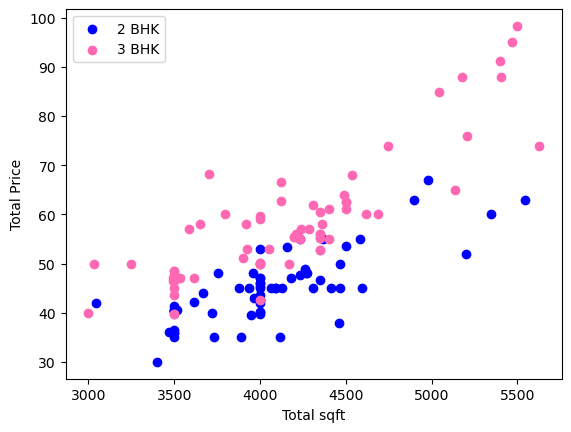

In [50]:
#plotting the scatter plot
def scatter_plot(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.price_per_sqrt,bhk2.price,c="blue",label="2 BHK")
    plt.scatter(bhk3.price_per_sqrt,bhk3.price,c="hotpink",label="3 BHK")
    plt.xlabel("Total sqft")
    plt.ylabel("Total Price")
    plt.legend()
    
scatter_plot(df4,"Uttarahalli")

In [51]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby("location"):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk] = {
                "mean":np.mean(bhk_df.price_per_sqrt),
                "std":np.std(bhk_df.price_per_sqrt),
                "count": bhk_df.shape[0]
            }
            
        for bhk,bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                exclude_indices = np.append(exclude_indices, bhk_df[(bhk_df.price_per_sqrt) < (stats['mean'])].index.values)
    return df.drop(exclude_indices,axis=0)
                
df5 = remove_bhk_outlier(df4)
df5.shape

(7029, 6)

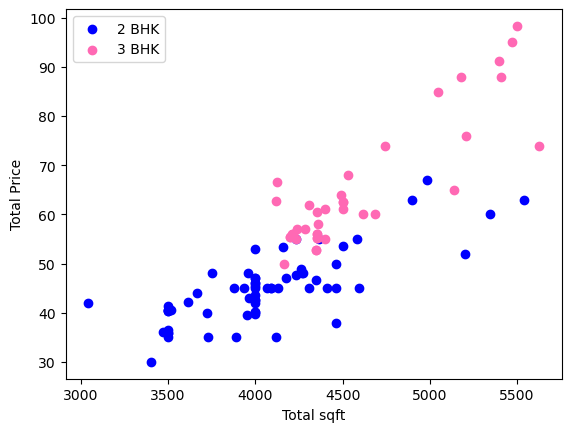

In [52]:
#plotting the scatter

scatter_plot(df5,"Uttarahalli")

<AxesSubplot:xlabel='price_per_sqrt', ylabel='Count'>

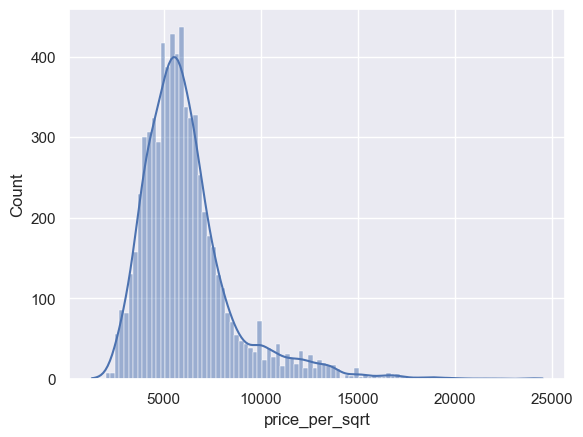

In [54]:
sns.set()
sns.histplot(x="price_per_sqrt",data=df5,kde=True)

In [55]:
#for bath column
df5.bath.value_counts()

2.0     3950
3.0     1723
1.0      560
4.0      500
5.0      173
6.0       81
7.0       17
8.0       13
9.0        7
12.0       3
16.0       1
13.0       1
Name: bath, dtype: int64

<AxesSubplot:xlabel='bath', ylabel='count'>

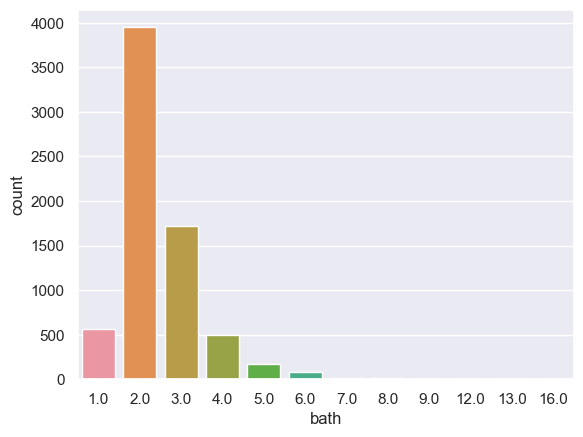

In [56]:
sns.set()
sns.countplot(x="bath",data=df5)

In [57]:
df5[df5.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqrt
5001,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8065,other,12000.0,12.0,525.0,10,4375.000000
8159,other,10000.0,16.0,550.0,16,5500.000000
8903,other,6000.0,12.0,150.0,11,2500.000000
9244,other,5425.0,13.0,275.0,13,5069.124424


In [58]:
df6 = df5[~(df5.bath>10)]
df6.shape

(7024, 6)

In [59]:
df6[df6['bath'] > df6['bhk']+2]

,location,total_sqft,bath,price,bhk,price_per_sqrt
1516,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
4970,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6347,Thanisandra,1806.0,6.0,116.0,3,6423.034330
7988,other,11338.0,9.0,1000.0,6,8819.897689


In [60]:
df7 = df6[df6['bath'] <= df6['bhk']+2]
df7.shape

(7020, 6)

In [61]:
df7

,location,total_sqft,bath,price,bhk,price_per_sqrt
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...
9833,other,1155.0,2.0,64.0,2,5541.125541
9835,other,1200.0,2.0,70.0,2,5833.333333
9836,other,1800.0,1.0,200.0,1,11111.111111
9839,other,812.0,1.0,26.0,1,3201.970443


# Model Building

In [62]:
dummies = pd.get_dummies(df7.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
# removing other columns from dummies dataframe
dummies = dummies.drop(["other"],axis=1)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df7 = pd.concat([df7,dummies],axis=1)
df7

,location,total_sqft,bath,price,bhk,price_per_sqrt,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9833,other,1155.0,2.0,64.0,2,5541.125541,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9835,other,1200.0,2.0,70.0,2,5833.333333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9836,other,1800.0,1.0,200.0,1,11111.111111,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9839,other,812.0,1.0,26.0,1,3201.970443,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# dropping location columns
df7 = df7.drop(["location"],axis=1)
df7.shape

(7020, 238)

In [66]:
# Extracting independent and dependent variables
x = df7.drop(["price","price_per_sqrt"],axis=1)
y = df7.price

In [67]:
x

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9833,1155.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9835,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9836,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9839,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
y

0       428.0
1       194.0
2       235.0
3       130.0
4       148.0
        ...  
9833     64.0
9835     70.0
9836    200.0
9839     26.0
9842    400.0
Name: price, Length: 7020, dtype: float64

# Fine-Tuning for best model and parameters selection

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model_and_params = {
    "linear_regrassion" : {
        "model":LinearRegression(),
        "params":{
            "normalize":[False,True]
        }
    },
    "lasso":{
        "model":Lasso(),
        "params":{
            "alpha":[1,2],
            "selection":["random","cyclic"]
        }
    },
    "random_forest":{
        "model":RandomForestRegressor(),
        "params":{
            "n_estimators":[1,10],
        }
    },
    "decision_tree":{
        "model":DecisionTreeRegressor(),
        "params":{
            "criterion":["mse","friedman_mse"],
            "splitter":["best","random"]
        }
    }
}      
    
scores = []

from sklearn.model_selection import GridSearchCV
for model_name,model_params in model_and_params.items():
    gsc = GridSearchCV(model_params["model"],model_params["params"],cv=5,return_train_score=False)
    gsc.fit(x,y)
    scores.append({
        "model":model_name,
        "best_scores":gsc.best_score_,
        "best_params":gsc.best_params_
    })

df = pd.DataFrame(scores,columns=["model","best_scores","best_params"])
df

,model,best_scores,best_params
0,linear_regrassion,-6.306809e+13,{'normalize': False}
1,lasso,6.799120e-01,"{'alpha': 2, 'selection': 'random'}"
2,random_forest,5.933439e-01,{'n_estimators': 10}
3,decision_tree,5.223321e-01,"{'criterion': 'mse', 'splitter': 'random'}"


In [70]:
# splitting the datsets into training and test sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [71]:
x_train.shape

(5616, 236)

In [72]:
x_test.shape

(1404, 236)

In [75]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [77]:
# accuracy of the train dataset 
lin_reg.score(x_train,y_train)

0.8604432855765676

In [78]:
# accuracy of the test dataset 
lin_reg.score(x_test,y_test)

0.8483074656658716

In [79]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=236)

In [80]:
np.where(x.columns=="1st Block Jayanagar")

(array([3], dtype=int64),)

In [81]:
np.where(x.columns=="1st Block Jayanagar")[0]

array([3], dtype=int64)

In [82]:
np.where(x.columns=="1st Block Jayanagar")[0][0]

3

In [83]:
# creating a predictive system
def predictive_system(location,sqrt,bath,bhk):
    
    # getting index of specific location
    loc_index = np.where(x.columns==location)[0][0]
    
    z = np.zeros(len(x.columns))
    # updating z array's values
    z[0] = sqrt
    z[1] = bath
    z[2] = bhk
    
    if loc_index >= 0:
        z[loc_index] = 1
        
    return lin_reg.predict([z])[0]

In [85]:
predictive_system("Electronic City Phase II",1056,2,2)

35.10373116055197

In [86]:
# save the model
import pickle as pk
with open("home_prices_model.pickle","wb") as f:
    pk.dump(lin_reg,f)

In [87]:
# location name as json
import json
columns = {
    "data_columns": [col.lower() for col in x.columns]
}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))